# Titanic Survivor Prediction

### The Challenge
🚢 The Titanic sank during her maiden voyage in 1912, causing more than half of their passengers' life.

Two datasets are given, the train.csv and test.csv. Both datasets contain the information of each passenger who boarded the Titanic ship, with the only difference is that train.csv tells us which passenger survives while test.csv does not. The challenge is to build a predictive model to predict which of those passengers in test.csv are more likely to survive.



### Problem Statement
The characteristics (features) that allow the Titanic passengers to survive.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [3]:
#loading training dataset
train=pd.read_csv("titanic_train.csv",index_col="PassengerId")
#loading testdataset
test=pd.read_csv("titanic_test.csv",index_col="PassengerId")

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

In [8]:
train.shape

(891, 11)

<b> 1. For getting the statistical summary of numerical variables we use the describe()

In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the age ranges from 0 to 80, with mean 29.699
- Age has some outliers too.

<b> 2. For getting the statistical summary of categorical features we use the describe(include = object)

In [10]:
train.describe(include= object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.

- Lets understand the outputs of the above table using variable <b>'sex'<br></b>
count: Number of observations = 891<br>
unique: Number of unique classes in the column = 2 classes<br>
top: The most occurring class = male<br>
frequency: Frequency of the most repeated class; out of 891 observations Reg has a frequency of 577<br>

### Checking For Null Values & Duplicates

In [11]:
train.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [12]:
test.isnull().sum().sort_values(ascending=False)

Cabin       327
Age          86
Fare          1
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Embarked      0
dtype: int64

In [13]:
drop_rows=train[train["Embarked"].isnull()==True].index.tolist()
train=train.drop(drop_rows,axis=0)
#now lets verify
train.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [14]:
#lets analyse cabin column
train["Cabin"].head()

PassengerId
1     NaN
2     C85
3     NaN
4    C123
5     NaN
Name: Cabin, dtype: object

In [15]:
#position of the cabin can be useful in analysing survival rate thus first letter needs to be extracted
#thus transforming Cabin column into categorical feature
#lets fill the null values in Cabin with X to represent another category in Cabin
train["Cabin"]=train["Cabin"].fillna("X")
test["Cabin"]=test["Cabin"].fillna("X")
#now extracting 1st letter from each Cabin value to make it as categorical feature
for i in range(len(train["Cabin"])):
    train["Cabin"].iloc[i]=train["Cabin"].iloc[i][0]
for i in range(len(test["Cabin"])):
    test["Cabin"].iloc[i]=test["Cabin"].iloc[i][0]

In [16]:
train.isnull().sum().sort_values(ascending=False)

Age         177
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [17]:
test.isnull().sum().sort_values(ascending=False)

Age         86
Fare         1
Pclass       0
Name         0
Sex          0
SibSp        0
Parch        0
Ticket       0
Cabin        0
Embarked     0
dtype: int64

In [18]:
#Alright now , lets take care of the null values in Age feature 
train["Age"]=train["Age"].fillna(train["Age"].mean())
test["Age"]=test["Age"].fillna(test["Age"].mean())

In [19]:
#now the only remaining null value is in Fare
test["Fare"]=test["Fare"].fillna(test["Fare"]).mean()

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Cabin     889 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


In [21]:
#Name and ticket are both unique for each passenger thus they will not be much effective for training our model
#drop useless values
test.drop(["Name","Ticket"],axis=1,inplace=True)
train.drop(["Name","Ticket"],axis=1,inplace=True)

In [22]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [23]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

### Univariate Data Analysis

In [24]:
for column in train.columns:
     print("\n" + column)
     print(train[column].value_counts())


Survived
0    549
1    340
Name: Survived, dtype: int64

Pclass
3    491
1    214
2    184
Name: Pclass, dtype: int64

Sex
male      577
female    312
Name: Sex, dtype: int64

Age
29.642093    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64

Cabin
X    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [25]:
df1_numerical= train.select_dtypes(include='number')

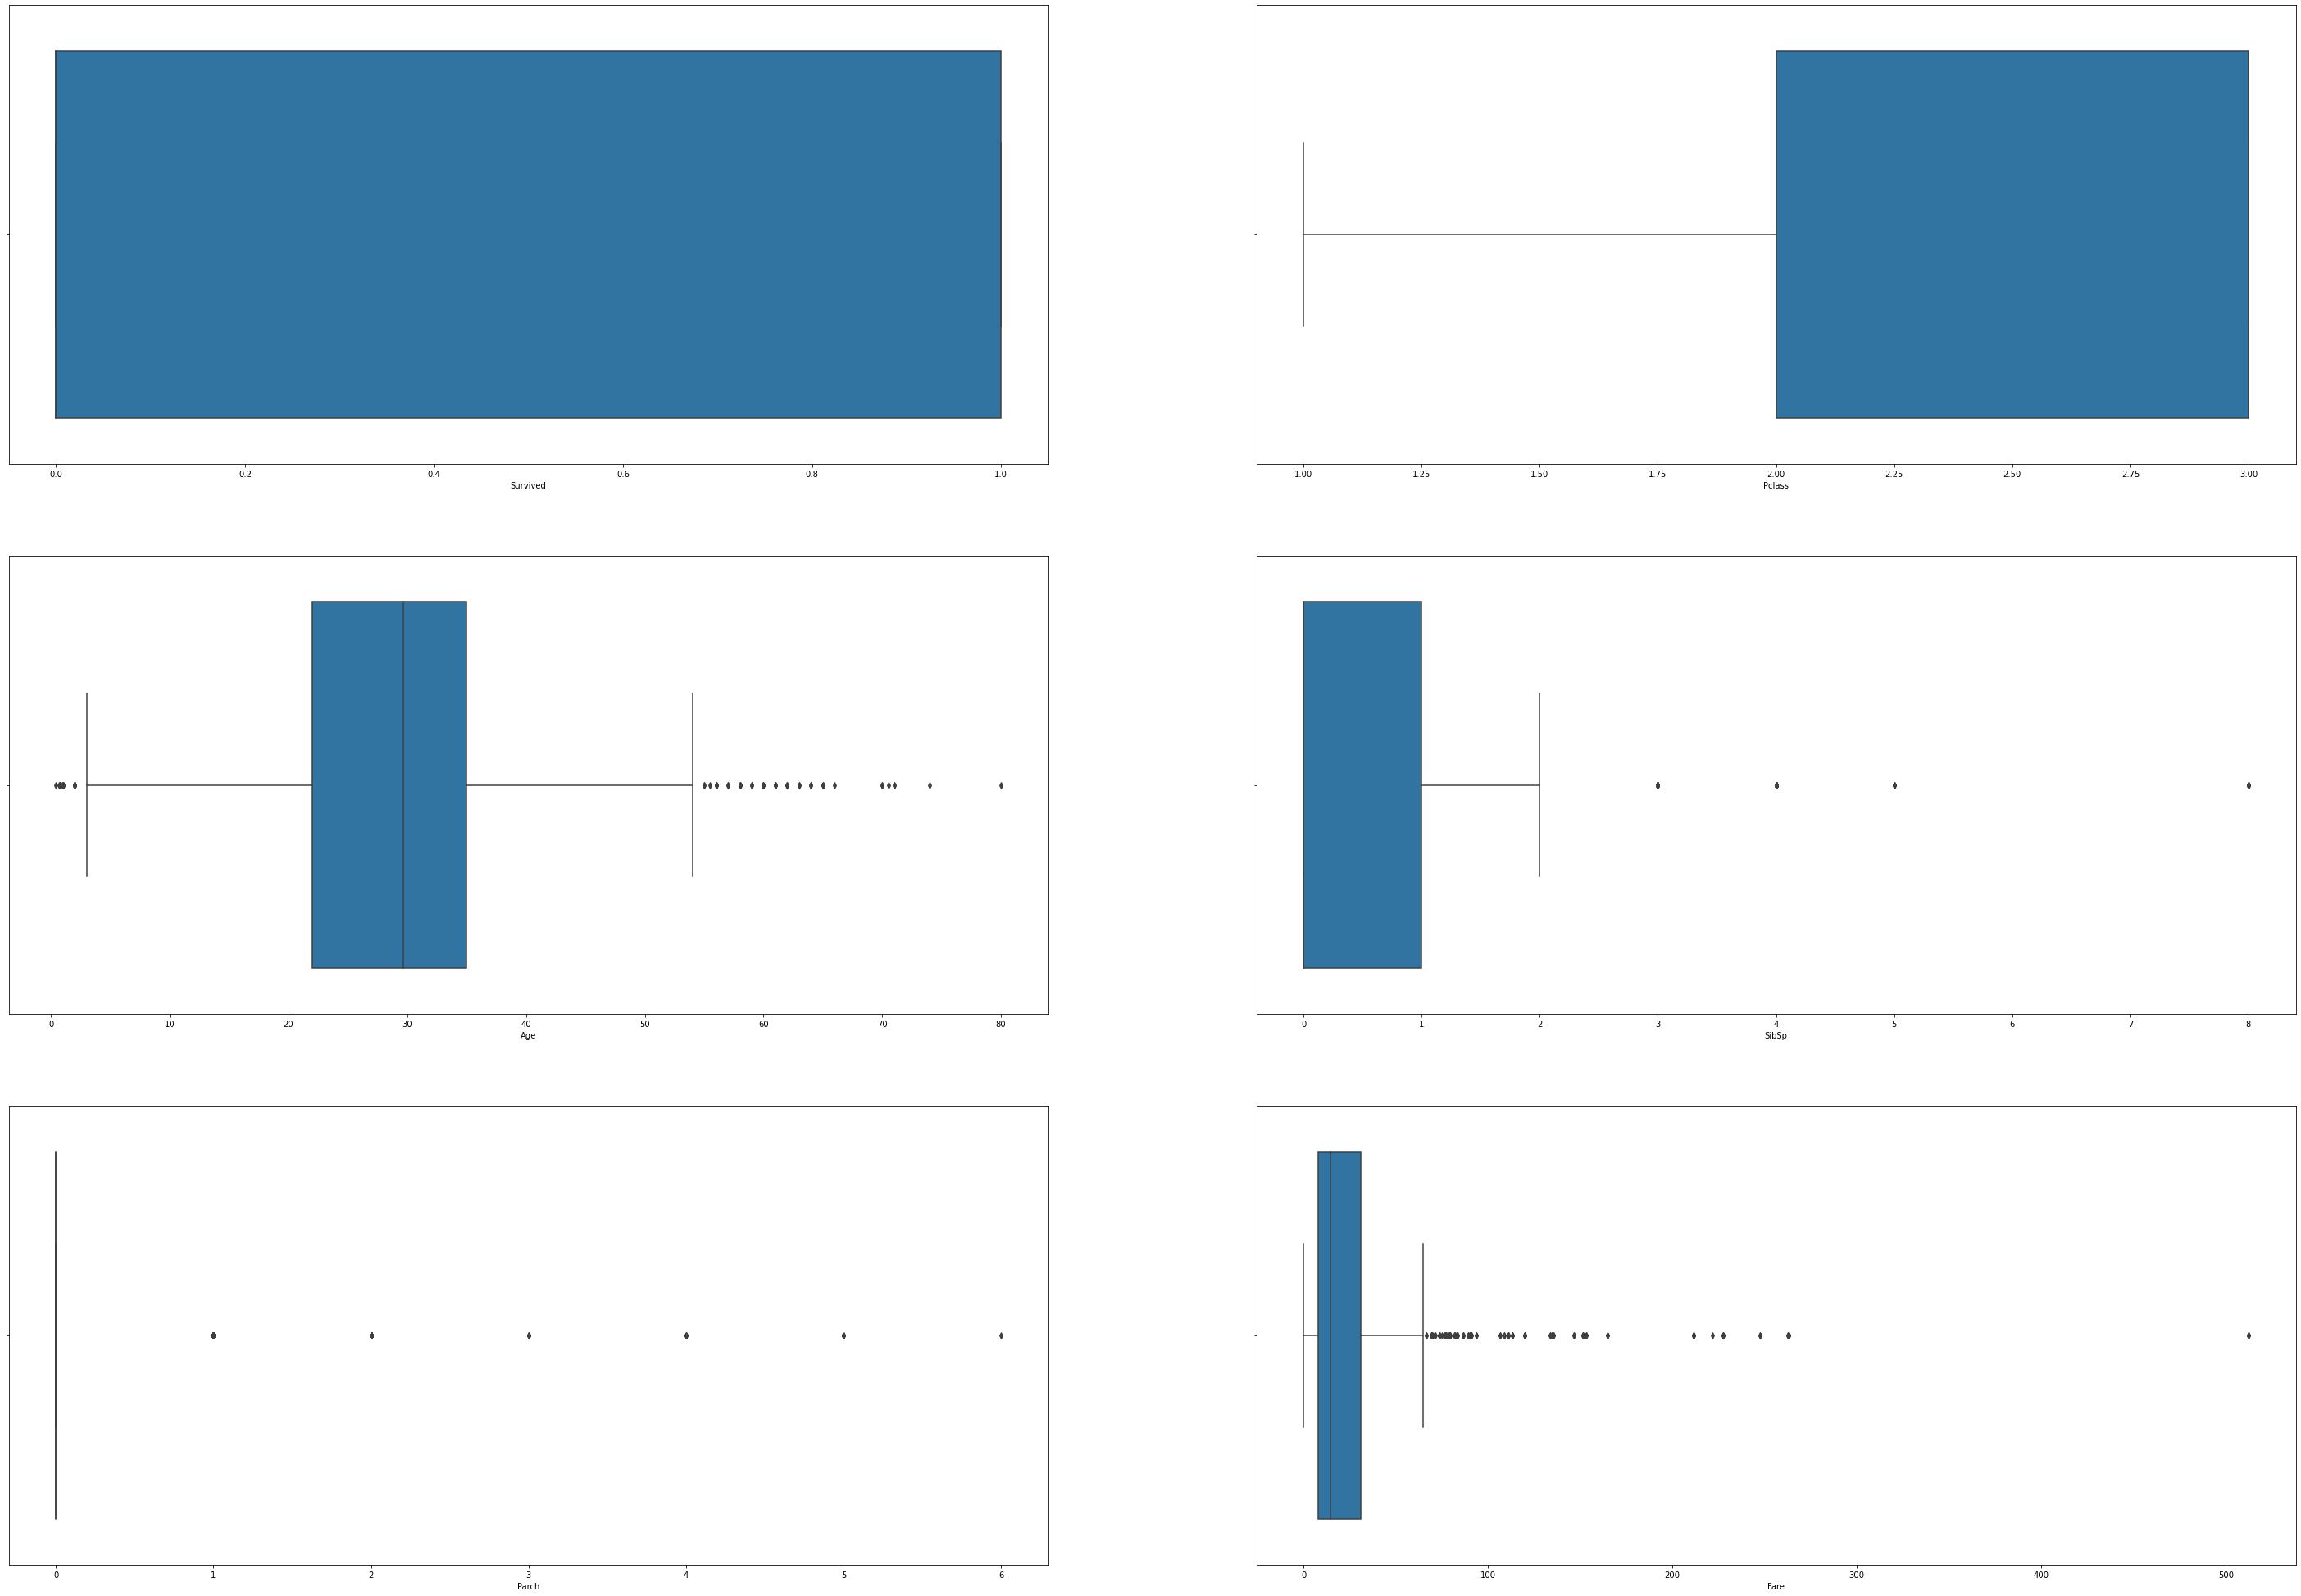

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (50, 35))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1_numerical, ax.flatten()):
    sns.boxplot(df1_numerical[variable], ax = subplot)

- There are some outliers present

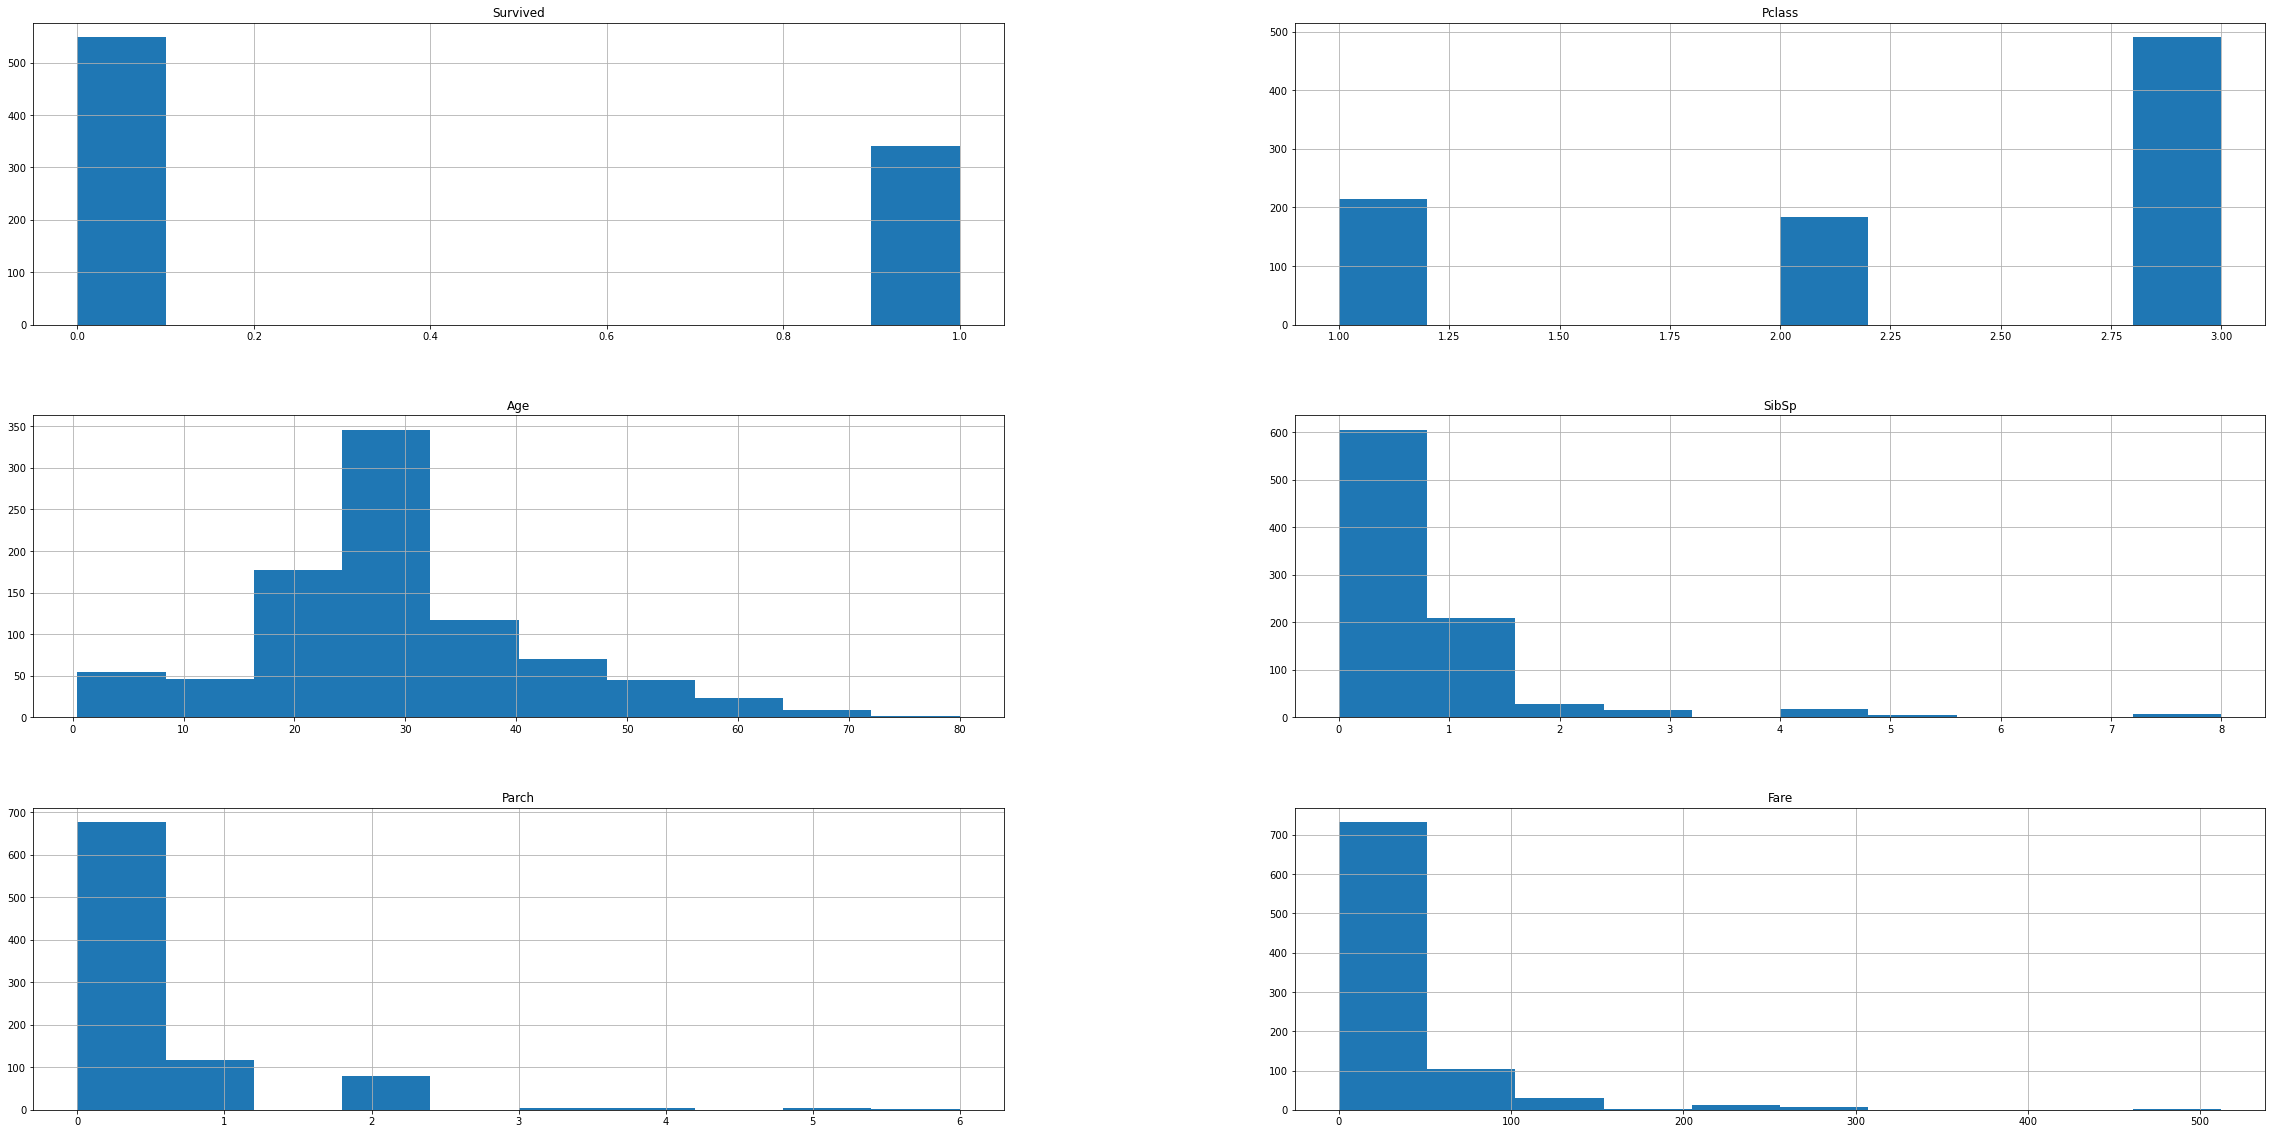

In [27]:
a=df1_numerical.hist(figsize=(40,20))

In [28]:
df1_categorical= train.select_dtypes(exclude='number')

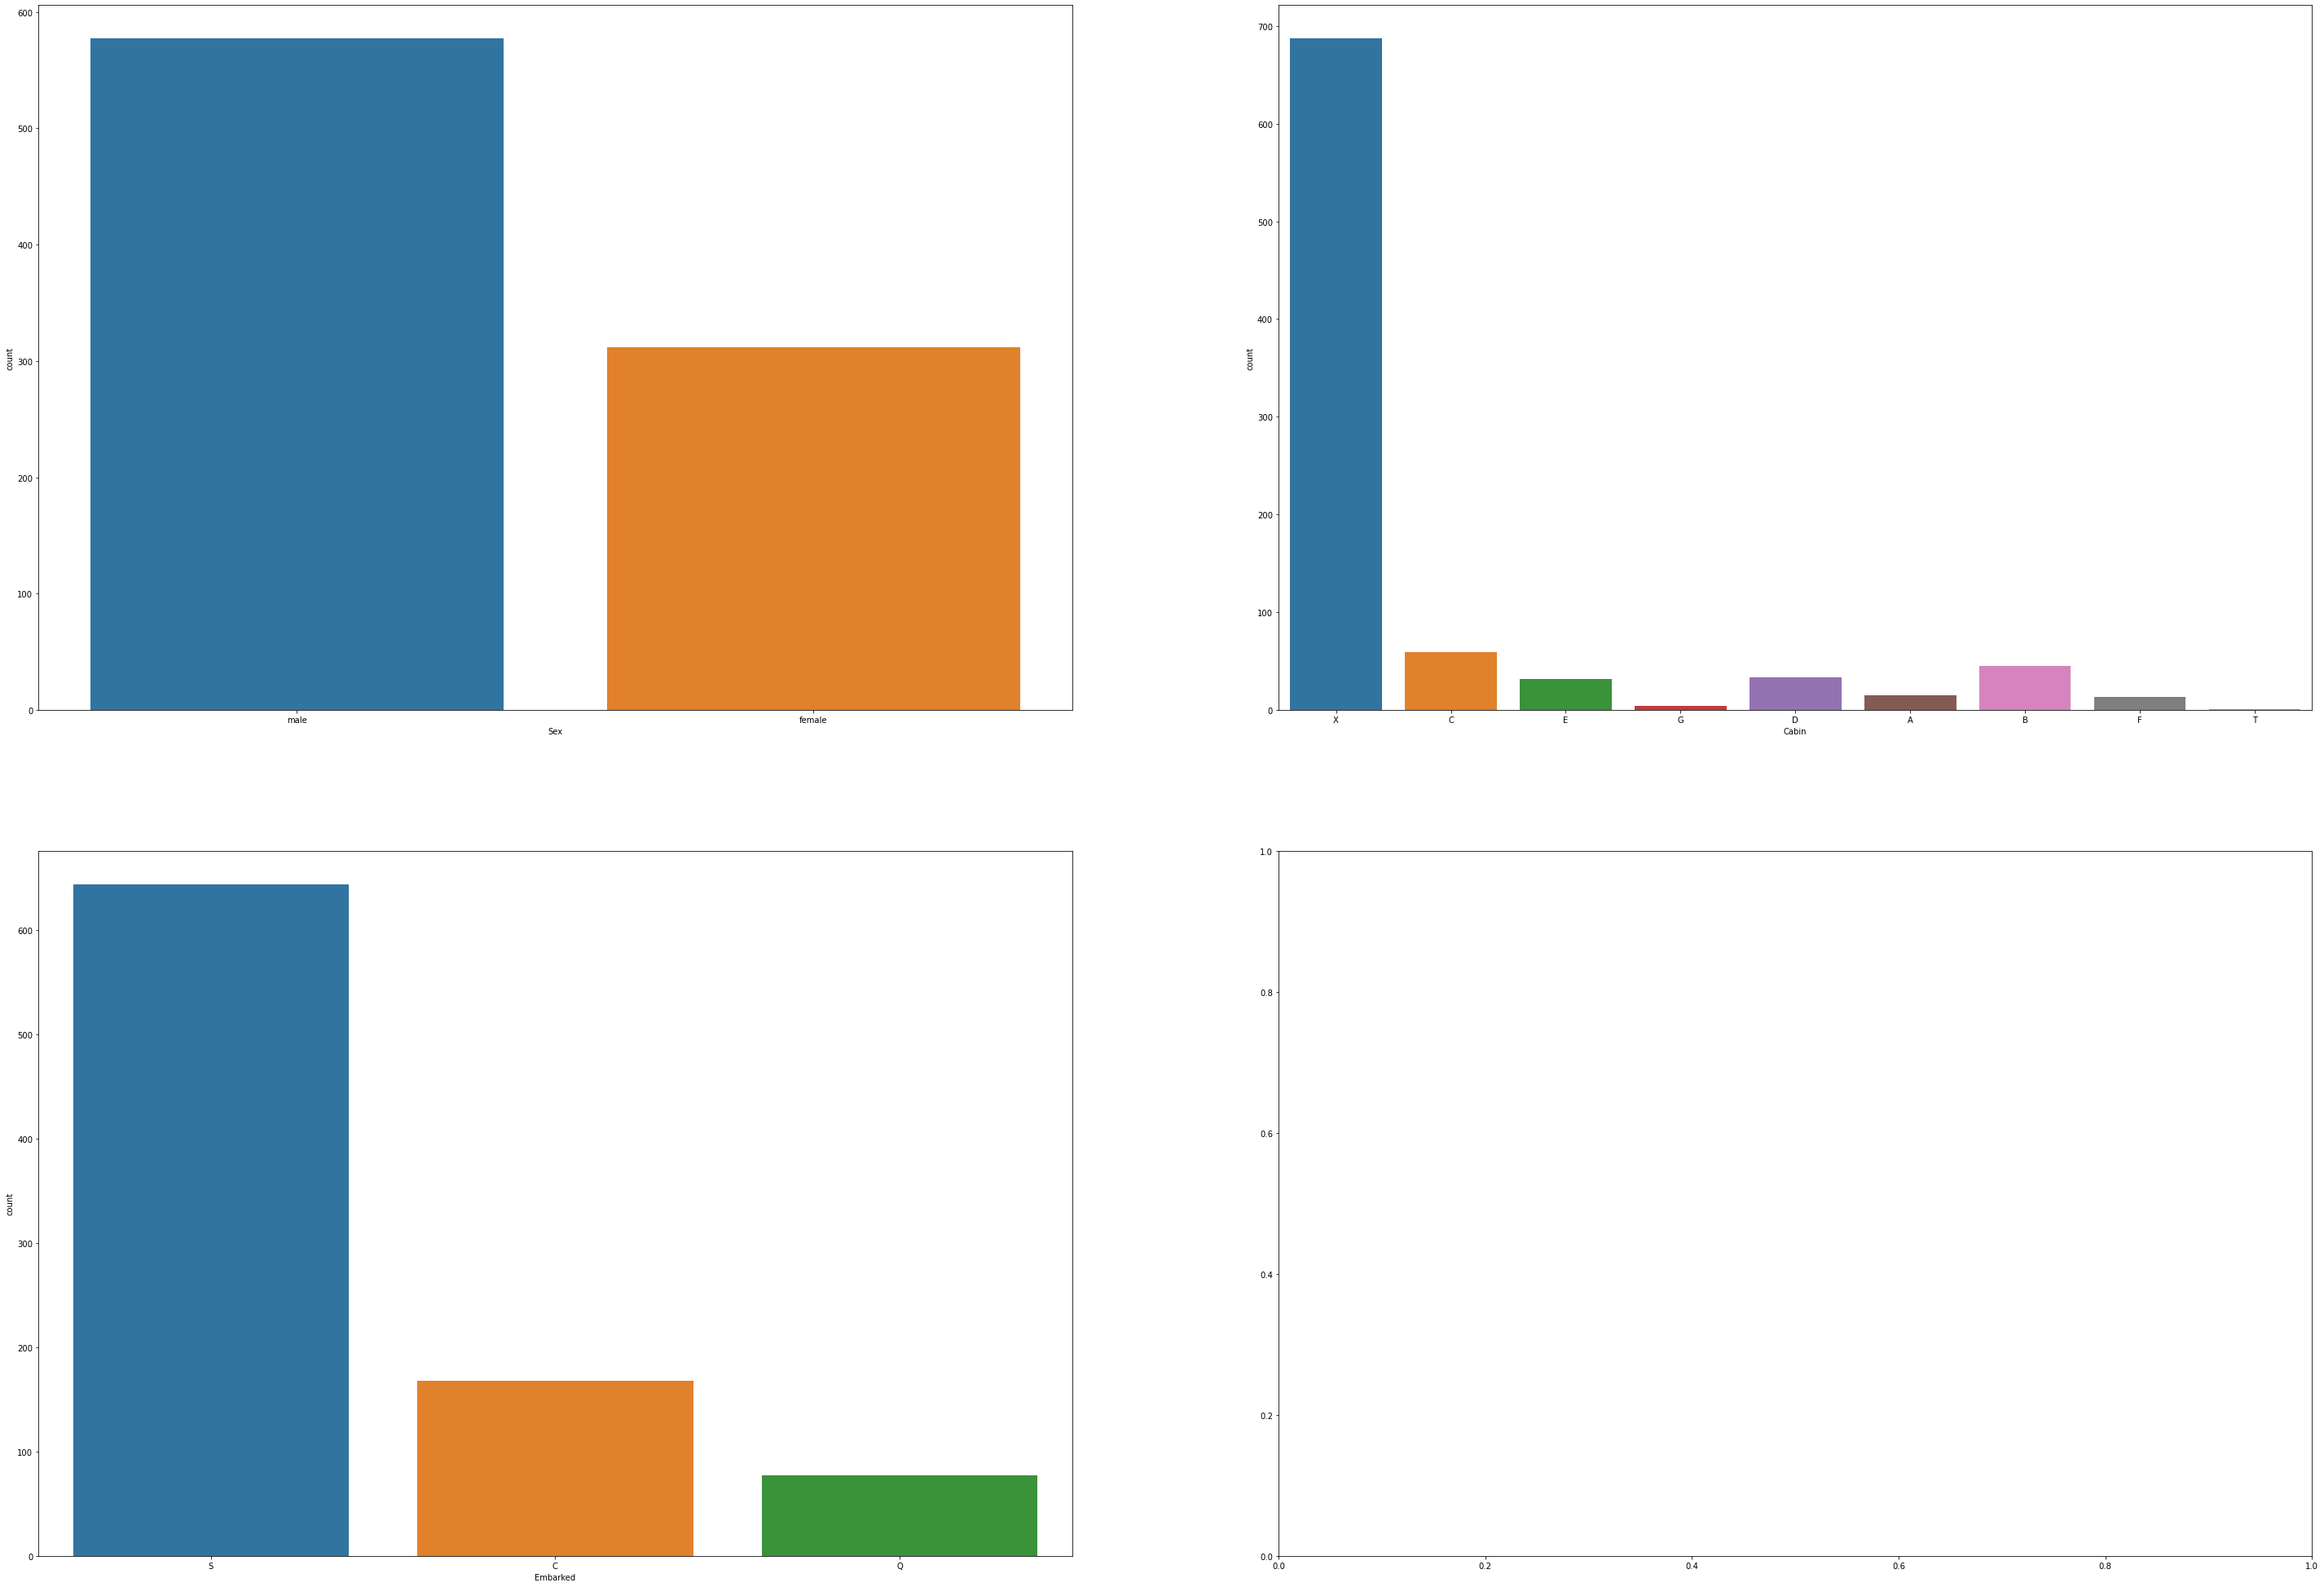

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(df1_categorical, ax.flatten()):
    sns.countplot(df1_categorical[variable], ax = subplot)

### Understanding Target Variable

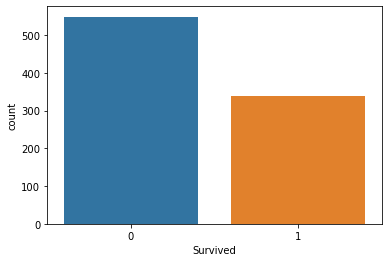

In [30]:
sns.countplot(train['Survived'])
plt.show()

### Bivariate Analysis

In [31]:
df1_cat = [i for i in train.columns if train[i].dtypes=='object']
print(df1_cat)

['Sex', 'Cabin', 'Embarked']


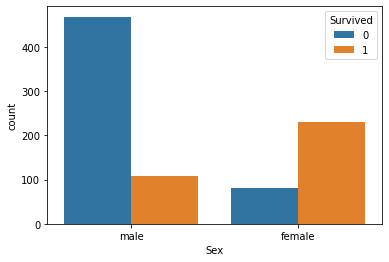

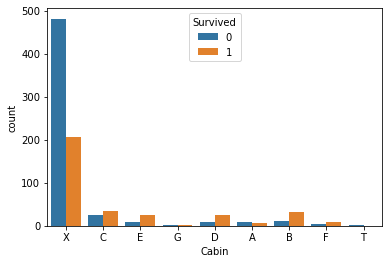

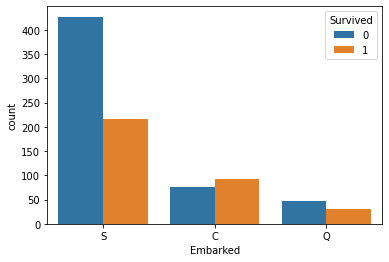

In [32]:
for i in df1_cat:
    sns.countplot(x = train[i], hue=train['Survived'])
    plt.show()

### Correlation

In [33]:
corr=train.corr
corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193
Age,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000


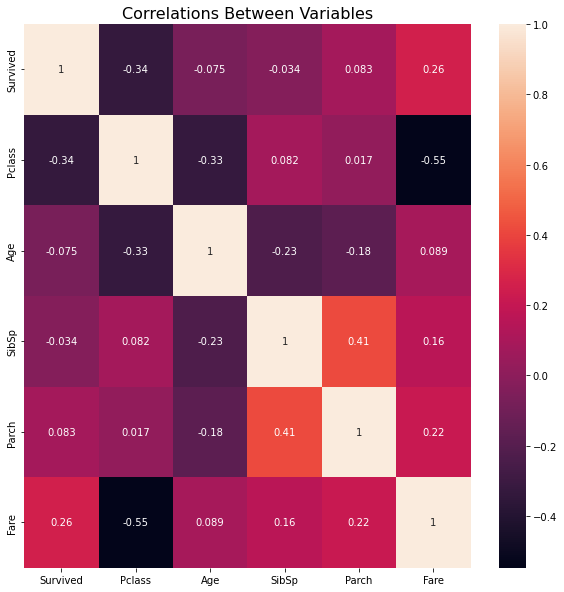

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)
plt.title("Correlations Between Variables", size=16)
plt.show()

- No High Correlation

### Outlier Treatment

In [35]:
train.describe(percentiles=[0.02,0.98])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
2%,0.000000,1.000000,2.000000,0.000000,0.000000,6.389500
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
98%,1.000000,3.000000,61.240000,4.000000,2.000000,211.337500
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.02))
    return x

In [37]:
out_cols_98 = ['Age','SibSp','Parch','Fare']

In [38]:
def oh1(x):
    x = x.clip(upper=x.quantile(0.98))
    x = x.clip(lower=x.quantile(0.02))
    return x

In [39]:
train[out_cols_98] = train[out_cols_98].apply(oh1)

In [40]:
train.describe(percentiles=[0.02,0.98])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.541587,0.487064,0.346457,30.679741
std,0.486260,0.834700,12.590214,0.909225,0.663810,39.803980
min,0.000000,1.000000,2.000000,0.000000,0.000000,6.389500
2%,0.000000,1.000000,2.000000,0.000000,0.000000,6.425980
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
98%,1.000000,3.000000,61.057600,4.000000,2.000000,211.337500
max,1.000000,3.000000,61.240000,4.000000,2.000000,211.337500


### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
lb = LabelEncoder()
for i in df1_cat:
    train[i] = lb.fit_transform(train[i])

In [43]:
train.dtypes.value_counts()

int64      5
float64    4
dtype: int64

#### We will now train models:

In [44]:
x = train.iloc[:,1:]
y = train.iloc[:,0]
print(x.shape)
print(y.shape)

(889, 8)
(889,)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,roc_curve

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 8)
(267, 8)
(622,)
(267,)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [48]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))
    auc_score  = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('AUC Score',auc_score)
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.plot(fpr,tpr,color='blue')
    plt.plot([0,1],[0,1],label='TPR=FPR',linestyle=':',color='black')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc=8)
    plt.grid()
    plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor

Training score 0.9871382636655949
Testing score 0.8202247191011236
Accuracy_Score 0.8202247191011236
Confusion Matrix
 [[148  21]
 [ 27  71]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       169
           1       0.77      0.72      0.75        98

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267

AUC Score 0.8729923922231615


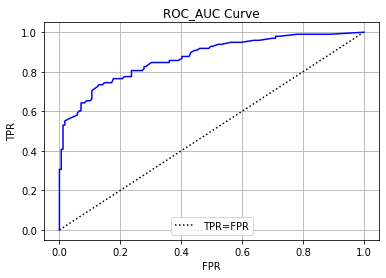

In [50]:
m1= RandomForestClassifier(n_estimators=70,criterion='gini')
gen_metrics(m1,x_train,x_test,y_train,y_test)

In [51]:
fimp_m1= pd.DataFrame({'Features':x_train.columns,
                      'Norm_Imp':m1.feature_importances_})
fimp_m1.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
5,Fare,0.248982
2,Age,0.246838
1,Sex,0.240791
0,Pclass,0.071635
6,Cabin,0.063822
3,SibSp,0.052233
7,Embarked,0.039133
4,Parch,0.036566


Training score 0.8778135048231511
Testing score 0.8314606741573034
Accuracy_Score 0.8314606741573034
Confusion Matrix
 [[156  13]
 [ 32  66]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       169
           1       0.84      0.67      0.75        98

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.83       267

AUC Score 0.87730950368313


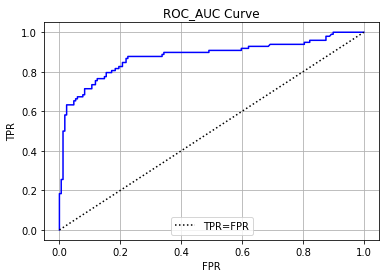

In [52]:
m2= RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=7,min_samples_split=10)
gen_metrics(m2,x_train,x_test,y_train,y_test)

In [53]:
fimp_m2= pd.DataFrame({'Features':x_train.columns,
                      'Norm_Imp':m2.feature_importances_})
fimp_m2.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
1,Sex,0.370054
5,Fare,0.181088
2,Age,0.153785
0,Pclass,0.105609
6,Cabin,0.069506
3,SibSp,0.047690
7,Embarked,0.040609
4,Parch,0.031659


## Analyzing Multiple Model Performance

### Logistic regression

In [54]:
import statsmodels.api as sm

In [55]:
m3 = LogisticRegression(max_iter=1000)
m3.fit(x,y)
y_pred_log_reg = m3.predict(x_test)

Training score 0.8102893890675241
Testing score 0.797752808988764
Accuracy_Score 0.797752808988764
Confusion Matrix
 [[148  21]
 [ 33  65]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       169
           1       0.76      0.66      0.71        98

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.80      0.79       267

AUC Score 0.8408706677937448


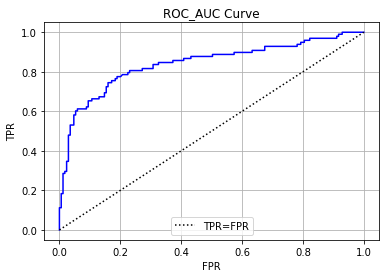

In [56]:
gen_metrics(m3,x_train,x_test,y_train,y_test)

### SGD

In [57]:
from sklearn.linear_model import SGDClassifier

In [58]:
sgd_model = SGDClassifier(max_iter=250,eta0=0.001,loss='log')
sgd_model.fit(x_train,y_train)
y_pred_sgd = sgd_model.predict(x_test)

Training score 0.6189710610932476
Testing score 0.6329588014981273
Accuracy_Score 0.6329588014981273
Confusion Matrix
 [[169   0]
 [ 98   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      1.00      0.78       169
           1       0.00      0.00      0.00        98

    accuracy                           0.63       267
   macro avg       0.32      0.50      0.39       267
weighted avg       0.40      0.63      0.49       267

AUC Score 0.5836855452240067


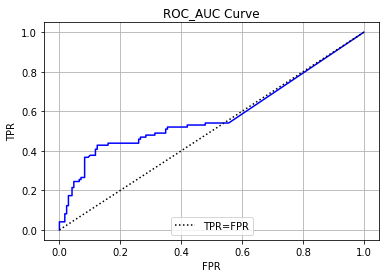

In [59]:
gen_metrics(sgd_model,x_train,x_test,y_train,y_test)

### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Training score 0.8440514469453376
Testing score 0.8164794007490637
Accuracy_Score 0.8164794007490637
Confusion Matrix
 [[158  11]
 [ 38  60]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       169
           1       0.85      0.61      0.71        98

    accuracy                           0.82       267
   macro avg       0.83      0.77      0.79       267
weighted avg       0.82      0.82      0.81       267

AUC Score 0.851497403695206


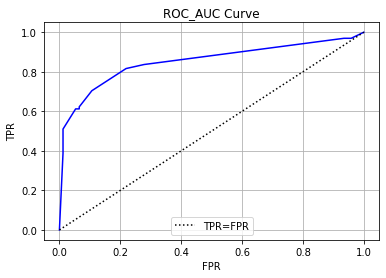

In [61]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=15)
dt_model = dt.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)
gen_metrics(dt_model,x_train,x_test,y_train,y_test)

In [62]:
from sklearn.tree import plot_tree,export_text

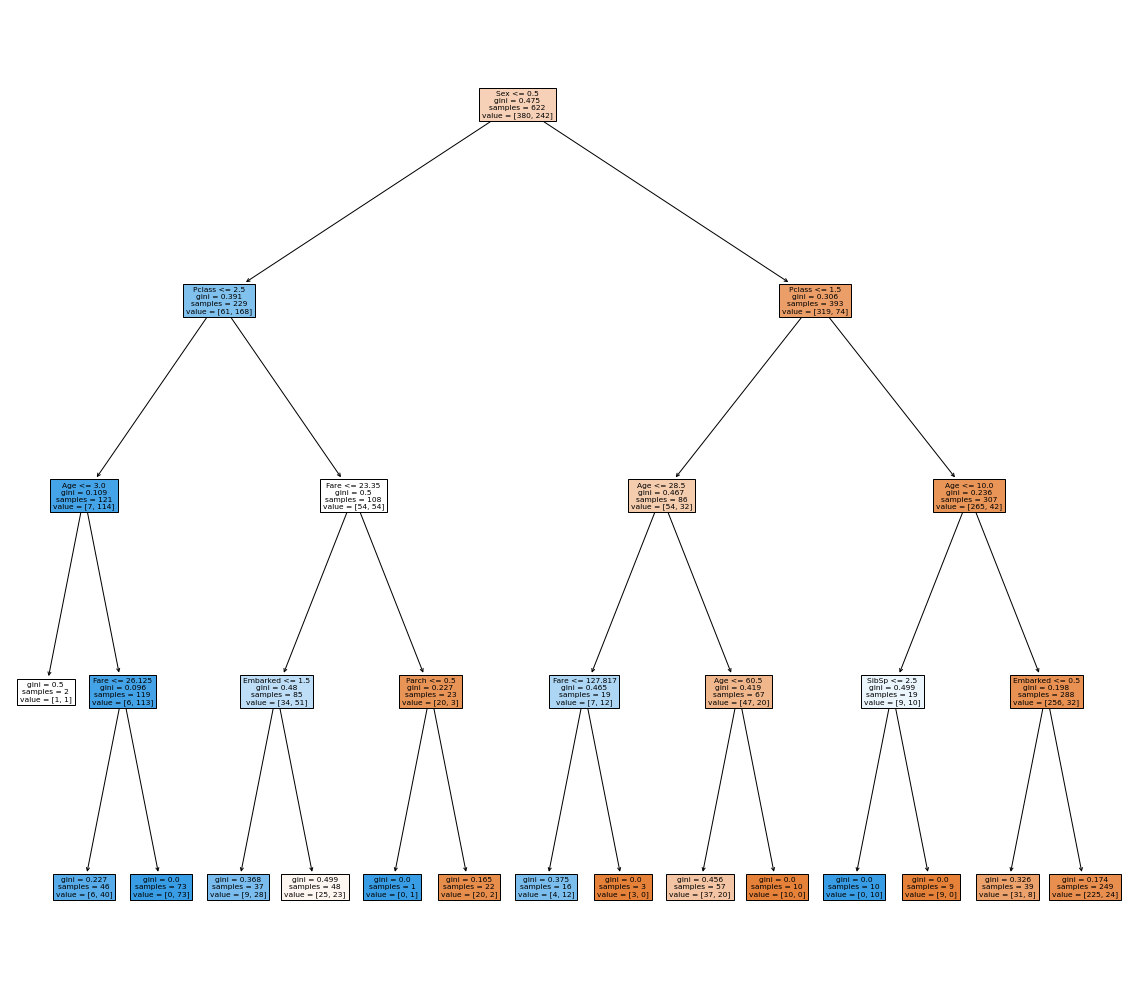

In [63]:
plt.figure(figsize=(20,18))
plot_tree(dt_model,feature_names=x_train.columns,filled=True)
plt.show()

### Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
tuned_parameters_dt = {'criterion':['gini','entropy'],"max_depth":[2,3,4,5,7,9,10],
                   "min_samples_split":[10,15,20,25,30,35]}
dt_est = DecisionTreeClassifier(random_state = 10)
grid_tree = GridSearchCV(dt_est,param_grid = tuned_parameters_dt, cv= 10)
dt_grid = grid_tree.fit(x_train, y_train)
y_pred_dt1 = dt_grid.predict(x_test)

In [66]:
print("Hyper Parameters:", dt_grid.best_params_)

Hyper Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10}


In [67]:
dt_gscv = DecisionTreeClassifier(criterion=dt_grid.best_params_.get("criterion"),max_depth = dt_grid.best_params_.get("max_depth"),
                                min_samples_split= dt_grid.best_params_.get("min_samples_split"))
dt_gscv_model = dt_gscv.fit(x_train,y_train)
y_pred_dt_gscv = dt_gscv_model.predict(x_test)

Training score 0.8344051446945338
Testing score 0.8239700374531835
Accuracy_Score 0.8239700374531835
Confusion Matrix
 [[160   9]
 [ 38  60]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       169
           1       0.87      0.61      0.72        98

    accuracy                           0.82       267
   macro avg       0.84      0.78      0.80       267
weighted avg       0.83      0.82      0.82       267

AUC Score 0.8544559835768626


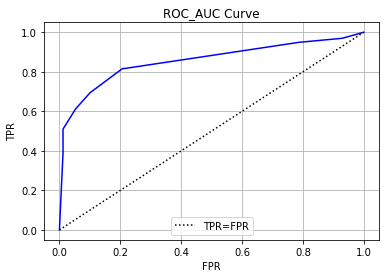

In [68]:
gen_metrics(dt_gscv_model,x_train,x_test,y_train,y_test)

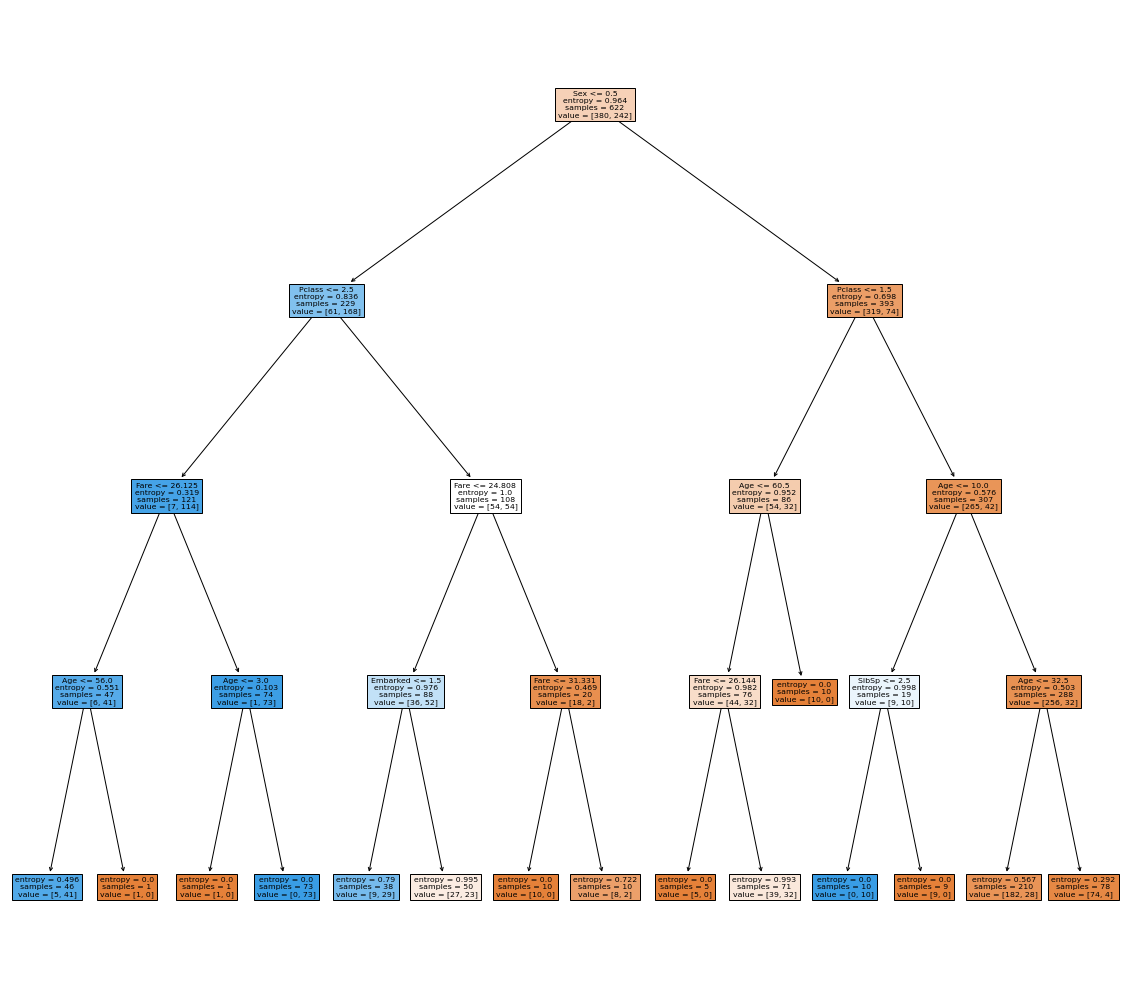

In [69]:
plt.figure(figsize=(20,18))
plot_tree(dt_gscv_model,feature_names=x_train.columns,filled=True)
plt.show()

### Random Forest

In [70]:
rf = RandomForestClassifier(criterion='entropy',max_depth = 7, min_samples_split= 30, n_estimators = 100)
rf_model = rf.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)

Training score 0.8520900321543409
Testing score 0.8352059925093633
Accuracy_Score 0.8352059925093633
Confusion Matrix
 [[157  12]
 [ 32  66]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       169
           1       0.85      0.67      0.75        98

    accuracy                           0.84       267
   macro avg       0.84      0.80      0.81       267
weighted avg       0.84      0.84      0.83       267

AUC Score 0.8825323028619732


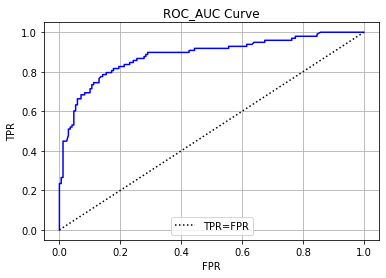

In [71]:
gen_metrics(rf_model,x_train,x_test,y_train,y_test)

### Grid Search

In [72]:
tuned_parameters_rf = {'criterion':['gini','entropy'],"n_estimators":[80,100,120],
                       "max_depth":[3,5,7,9,10],
                   "min_samples_split":[15,20,25,30,35]}
rf_est = RandomForestClassifier(random_state = 10)
grid_tree = GridSearchCV(rf_est,param_grid = tuned_parameters_rf, cv= 10)
rf_grid = grid_tree.fit(x_train, y_train)
y_pred_rf1 = rf_grid.predict(x_test)

In [73]:
print("Hyper paramters:", rf_grid.best_params_)

Hyper paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 25, 'n_estimators': 100}


In [74]:
rf_gscv = RandomForestClassifier(criterion = rf_grid.best_params_.get("criterion"),max_depth = rf_grid.best_params_.get("max_depth"),
                           min_samples_split= rf_grid.best_params_.get("min_samples_split"),
                           n_estimators = rf_grid.best_params_.get("n_estimators"))
rf_gscv_model = rf_gscv.fit(x_train,y_train)
y_pred_rf_gscv = rf_gscv_model.predict(x_test)

Training score 0.8488745980707395
Testing score 0.8202247191011236
Accuracy_Score 0.8202247191011236
Confusion Matrix
 [[156  13]
 [ 35  63]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       169
           1       0.83      0.64      0.72        98

    accuracy                           0.82       267
   macro avg       0.82      0.78      0.80       267
weighted avg       0.82      0.82      0.81       267

AUC Score 0.880902064967999


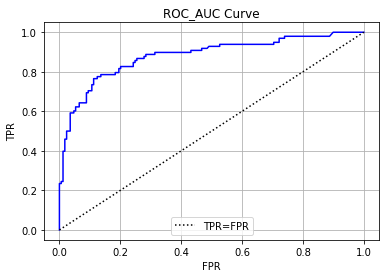

In [75]:
gen_metrics(rf_gscv_model,x_train,x_test,y_train,y_test)

## Results

In [76]:
from sklearn import metrics

In [77]:
models=pd.DataFrame({"Model Name":["Logistic Regression Model",
                           "SGD Model","Decision Tree Model-1",
                           "Decision Tree Model-Optimized","Random Forest Model-1",'Random Forest Model- Optimized'],
             "F-1 Score":[metrics.f1_score(y_test,y_pred_log_reg),
                          metrics.f1_score(y_test,y_pred_sgd),
                         metrics.f1_score(y_test,y_pred_dt),
                         metrics.f1_score(y_test,y_pred_dt1),
                         metrics.f1_score(y_test,y_pred_rf),
                         metrics.f1_score(y_test,y_pred_rf_gscv)],
             "Accuracy":[metrics.accuracy_score(y_test,y_pred_log_reg),
                        metrics.accuracy_score(y_test,y_pred_sgd),
                        metrics.accuracy_score(y_test,y_pred_dt),
                        metrics.accuracy_score(y_test,y_pred_dt1),
                        metrics.accuracy_score(y_test,y_pred_rf),
                        metrics.accuracy_score(y_test,y_pred_rf_gscv)],
             "Recall":[metrics.recall_score(y_test,y_pred_log_reg),
                      metrics.recall_score(y_test,y_pred_sgd),
                      metrics.recall_score(y_test,y_pred_dt),
                      metrics.recall_score(y_test,y_pred_dt1),
                      metrics.recall_score(y_test,y_pred_rf),
                      metrics.recall_score(y_test,y_pred_rf_gscv)],
             "Precision":[metrics.precision_score(y_test,y_pred_log_reg),
                      metrics.precision_score(y_test,y_pred_sgd),
                      metrics.precision_score(y_test,y_pred_dt),
                      metrics.precision_score(y_test,y_pred_dt1),
                      metrics.precision_score(y_test,y_pred_rf),
                      metrics.precision_score(y_test,y_pred_rf_gscv)
                         ]})
models

,Model Name,F-1 Score,Accuracy,Recall,Precision
0,Logistic Regression Model,0.717391,0.805243,0.673469,0.767442
1,SGD Model,0.666667,0.760300,0.653061,0.680851
2,Decision Tree Model-1,0.710059,0.816479,0.612245,0.845070
3,Decision Tree Model-Optimized,0.718563,0.823970,0.612245,0.869565
4,Random Forest Model-1,0.720000,0.816479,0.642857,0.818182
5,Random Forest Model- Optimized,0.734463,0.823970,0.663265,0.822785


### Conclusion 
- Overall Random Forest Optimized Model performs the best

### Training model on entire data with best parameters of Random Forest Model

In [78]:
rf_gscv1 = RandomForestClassifier(criterion = rf_grid.best_params_.get("criterion"),max_depth = rf_grid.best_params_.get("max_depth"),
                           min_samples_split= rf_grid.best_params_.get("min_samples_split"),
                           n_estimators = rf_grid.best_params_.get("n_estimators"))
rf_gscv_model1 = rf_gscv1.fit(x,y)

In [79]:
print('Training score',rf_gscv_model1.score(x,y))

Training score 0.8458942632170978


In [80]:
auc_score3 = roc_auc_score(y,rf_gscv_model1.predict_proba(x)[:,1])
print('Area Under Curve',auc_score3)

Area Under Curve 0.8987651344690882


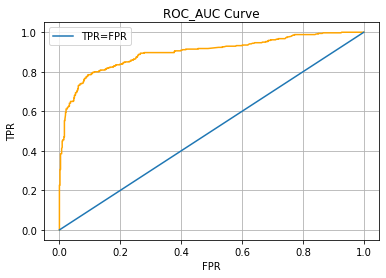

In [81]:
fpr,tpr,thresh = roc_curve(y,rf_gscv_model1.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

### Making Predictions on test data:

In [82]:
df1_cat = [i for i in test.columns if test[i].dtypes=='object']
print(df1_cat)

['Sex', 'Cabin', 'Embarked']


In [83]:
lb = LabelEncoder()
for i in df1_cat:
    test[i] = lb.fit_transform(test[i])

In [84]:
ypred_test3  = rf_gscv_model1.predict(test)
print(ypred_test3)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


In [85]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,35.627188,7,1
893,3,0,47.0,1,0,35.627188,7,2
894,2,1,62.0,0,0,35.627188,7,1
895,3,1,27.0,0,0,35.627188,7,2
896,3,0,22.0,1,1,35.627188,7,2


## Conclusion:
After training the entire ML Model we see that the Model has about 85% accuracy

### Adding the result to a Dataframe:

In [86]:
prediction=test.copy()
prediction.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,35.627188,7,1
893,3,0,47.0,1,0,35.627188,7,2
894,2,1,62.0,0,0,35.627188,7,1
895,3,1,27.0,0,0,35.627188,7,2
896,3,0,22.0,1,1,35.627188,7,2


In [87]:
prediction['Survived']=ypred_test3

In [88]:
prediction.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,35.627188,7,1,0
893,3,0,47.0,1,0,35.627188,7,2,0
894,2,1,62.0,0,0,35.627188,7,1,0
895,3,1,27.0,0,0,35.627188,7,2,0
896,3,0,22.0,1,1,35.627188,7,2,0
